<a href="https://colab.research.google.com/github/2303A52357/2303A52357_Explainable-AI_2025/blob/main/bone_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIME not available; LIME explanations will be skipped.
PDPbox not available; PDP plots will be skipped.
Loading data from: /content/Bone Tumor Dataset.csv
Data shape: (500, 9)
Columns: ['Patient ID', 'Sex', 'Age', 'Grade', 'Histological type', 'MSKCC type', 'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment']

--- Head ---
  Patient ID     Sex  Age         Grade  \
0    STS_001  Female   63          High   
1    STS_002  Female   54  Intermediate   
2    STS_003    Male   22  Intermediate   
3    STS_004  Female   54  Intermediate   
4    STS_005    Male   63          High   

                            Histological type      MSKCC type  \
0                 pleiomorphic leiomyosarcoma  Leiomyosarcoma   
1                 pleiomorphic leiomyosarcoma             MFH   
2                            synovial sarcoma             MFH   
3                            synovial sarcoma  Leiomyosarcoma   
4  pleiomorphic spindle cell undifferentiated             MFH   

    Site of primar

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:32:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost results:
Accuracy: 0.76
Precision: 0.6669590643274854
Recall: 0.6919662258645309
F1: 0.6711889537577611
ROC-AUC: 0.8700021729682748
Confusion Matrix:
 [[45  8  6]
 [ 1 26  1]
 [ 4  4  5]]

Training GradientBoosting...

GradientBoosting results:
Accuracy: 0.76
Precision: 0.6482206682206683
Recall: 0.665719873346992
F1: 0.6473291037168896
ROC-AUC: 0.8555829763456883
Confusion Matrix:
 [[47  6  6]
 [ 2 25  1]
 [ 1  8  4]]

--- Summary (Classical ML) ---
                 name  accuracy  precision    recall        f1   roc_auc
2        RandomForest      0.79   0.715909  0.716397  0.713020  0.883226
0  LogisticRegression      0.79   0.714736  0.722652  0.711365  0.883700
5             XGBoost      0.76   0.666959  0.691966  0.671189  0.870002
3                 SVM      0.78   0.687636  0.670764  0.668309  0.878205
6    GradientBoosting      0.76   0.648221  0.665720  0.647329  0.855583
4                 KNN      0.75   0.643514  0.627569  0.622589  0.829919
1        DecisionTree    

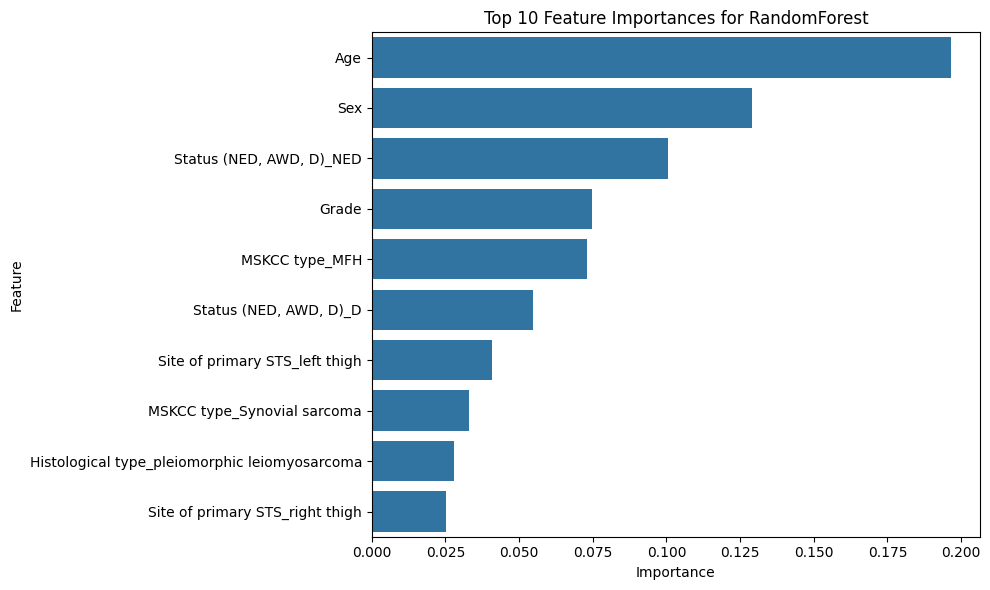


--- SHAP Explanations ---


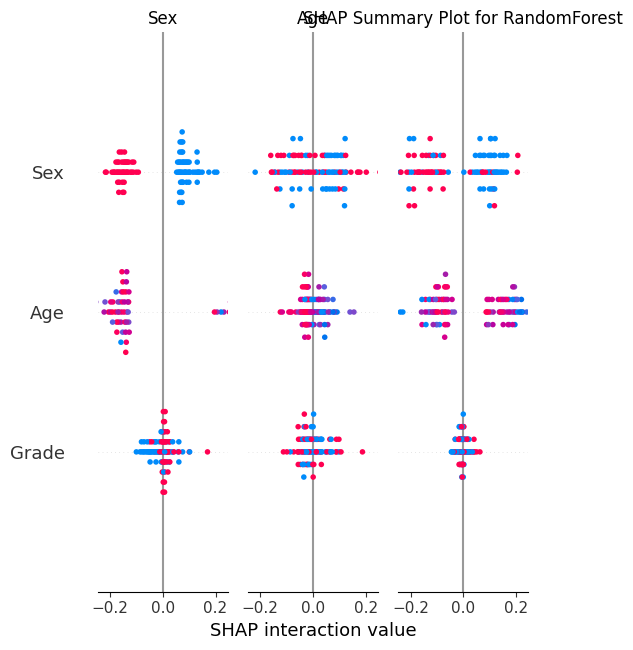

Generating SHAP dependence plot for top feature: Age


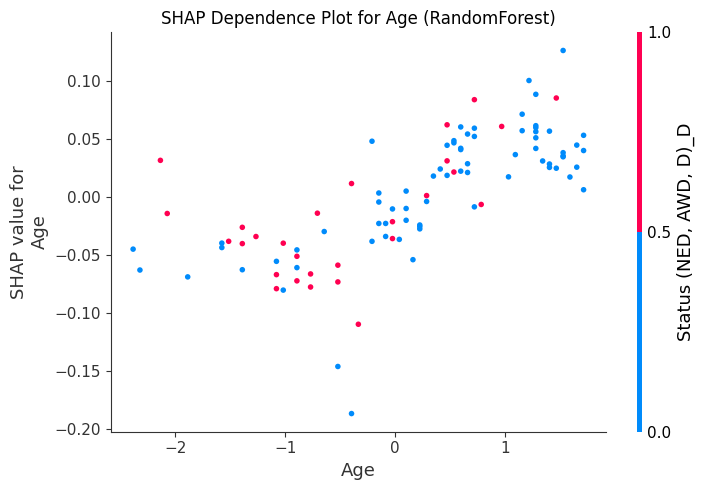

Skipping LIME (not available, not suitable for model type, or no features).
Skipping PDP (not available, not suitable for model type, or no features).

--- Saving Results and Model ---
Model evaluation results saved to /mnt/data/model_evaluation_results.csv
Best classical ML model (RandomForest) saved to /mnt/data/best_model_RandomForest.joblib
Preprocessing objects saved to /mnt/data/preprocessing_objects.joblib

Bone Disease Classification pipeline completed successfully!


In [ ]:
# Bone Disease Classification - Colab-ready script (Final, corrected)
"""
Professional Google Colab-ready script for Bone Disease Classification.

Features:
- Automatic dataset loading and EDA
- Preprocessing: missing values, categorical encoding, scaling
- Classical ML models: Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Gradient Boosting, optional XGBoost
- Optional Deep Learning models (MLP, 1D-CNN, LSTM, Hybrid, Autoencoder) if TensorFlow is installed
- Evaluation: Accuracy, Precision, Recall, F1, ROC-AUC (when available), confusion matrix
- XAI: feature importances, optional SHAP, LIME, PDP
- Results saved to /mnt/data

Before running in Colab, install required packages (one-time):
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost joblib tensorflow shap lime pdpbox

Save your CSV to /mnt/data/Bone Tumor Dataset.csv or update DATA_PATH.
"""

# -------------------- Imports --------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Optional imports: try to import; if missing, skip related steps with clear messages
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False
    print('xgboost not available; XGBoost will be skipped.')

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    TF_AVAILABLE = True
except Exception:
    TF_AVAILABLE = False
    print('TensorFlow not available; deep learning models will be skipped.')

try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False
    print('SHAP not available; SHAP explanations will be skipped.')

try:
    from lime.lime_tabular import LimeTabularExplainer
    LIME_AVAILABLE = True
except Exception:
    LIME_AVAILABLE = False
    print('LIME not available; LIME explanations will be skipped.')

try:
    from pdpbox import pdp
    PDP_AVAILABLE = True
except Exception:
    PDP_AVAILABLE = False
    print('PDPbox not available; PDP plots will be skipped.')

try:
    import joblib
except Exception:
    joblib = None
    print('joblib not available; model saving will be skipped.')

# -------------------- Load dataset --------------------
DATA_PATH = '/content/Bone Tumor Dataset.csv'
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Please upload the CSV and re-run.")

print('Loading data from:', DATA_PATH)
df = pd.read_csv("/content/Bone Tumor Dataset.csv")
print('Data shape:', df.shape)
print('Columns:', df.columns.tolist())

# Quick EDA
print('\n--- Head ---')
print(df.head())
print('\n--- Info ---')
print(df.info())
print('\n--- Describe ---')
print(df.describe(include='all'))

# -------------------- Preprocessing --------------------
# Detect target column automatically from common names; else use last column
TARGET_COL = None
possible_targets = ['target','label','diagnosis','class','Class','status','Outcome','outcome']
for t in possible_targets:
    if t in df.columns:
        TARGET_COL = t
        break
if TARGET_COL is None:
    TARGET_COL = df.columns[-1]
    print(f"No standard target column found. Using last column as target: {TARGET_COL}")
else:
    print('Detected target column:', TARGET_COL)

# Separate features and target
X = df.drop(columns=[TARGET_COL]).copy()
y = df[TARGET_COL].copy()

# Drop obvious identifier columns if present
if 'Patient ID' in X.columns:
    X = X.drop(columns=['Patient ID'])

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
if num_cols:
    X[num_cols] = num_imputer.fit_transform(X[num_cols])
if cat_cols:
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Encode categorical variables: binary with LabelEncoder, multi-class with one-hot
label_encoders = {}
for col in list(cat_cols):
    if X[col].nunique() == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
    else:
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
        X = pd.concat([X.drop(columns=[col]), dummies], axis=1)

# After encoding, all features should be numeric
# Refresh num_cols as new numeric columns might have been added from one-hot encoding
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Scale features
scaler = StandardScaler()
if num_cols:
    X[num_cols] = scaler.fit_transform(X[num_cols])

# Encode target if needed
if y.dtype == 'object' or y.dtype.name == 'category':
    y_le = LabelEncoder()
    y = y_le.fit_transform(y)
    print('Target classes:', list(y_le.classes_))
else:
    y = y.values

# Split dataset (80/20). Use stratify when possible
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
except Exception as e:
    print('Stratify failed:', e, 'Falling back to non-stratified split.')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# -------------------- Utilities --------------------
from collections import OrderedDict

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, 'predict_proba'):
        try:
            y_proba = model.predict_proba(X_test)
        except Exception:
            y_proba = None
    elif hasattr(model, 'decision_function'):
        try:
            y_proba = model.decision_function(X_test)
        except Exception:
            y_proba = None

    n_classes = len(np.unique(y_test))
    average_method = 'binary' if n_classes == 2 else 'macro'

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average=average_method, zero_division=0)
    rec = recall_score(y_test, y_pred, average=average_method, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=average_method, zero_division=0)

    roc = None
    try:
        if y_proba is not None:
            if n_classes == 2 and y_proba.ndim > 1 and y_proba.shape[1] > 1:
                roc = roc_auc_score(y_test, y_proba[:,1])
            elif n_classes > 2 and y_proba.ndim > 1:
                roc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
            elif n_classes == 2 and y_proba.ndim == 1:
                roc = roc_auc_score(y_test, y_proba)
    except Exception as e:
        print(f"Could not calculate ROC-AUC: {e}")
        roc = None


    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} results:")
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1:', f1)
    print('ROC-AUC:', roc)
    print('Confusion Matrix:\n', cm)
    return OrderedDict(name=name, accuracy=acc, precision=prec, recall=rec, f1=f1, roc_auc=roc)

# -------------------- Classical ML Models --------------------
results = []
models = {} # Store models for later XAI

print('\nTraining Logistic Regression...')
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
results.append(evaluate_model('LogisticRegression', lr, X_test, y_test))
models['LogisticRegression'] = lr

print('\nTraining Decision Tree...')
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results.append(evaluate_model('DecisionTree', dt, X_test, y_test))
models['DecisionTree'] = dt

print('\nTraining Random Forest...')
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
results.append(evaluate_model('RandomForest', rf, X_test, y_test))
models['RandomForest'] = rf

print('\nTraining SVM...')
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
results.append(evaluate_model('SVM', svm, X_test, y_test))
models['SVM'] = svm

print('\nTraining KNN...')
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
results.append(evaluate_model('KNN', knn, X_test, y_test))
models['KNN'] = knn

if XGB_AVAILABLE:
    print('\nTraining XGBoost...')
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_clf.fit(X_train, y_train)
    results.append(evaluate_model('XGBoost', xgb_clf, X_test, y_test))
    models['XGBoost'] = xgb_clf
else:
    print('\nSkipping XGBoost (not installed).')

print('\nTraining GradientBoosting...')
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
results.append(evaluate_model('GradientBoosting', gb, X_test, y_test))
models['GradientBoosting'] = gb

# Summarize classical ML results
results_df = pd.DataFrame(results)
print('\n--- Summary (Classical ML) ---')
print(results_df.sort_values('f1', ascending=False))

# -------------------- Deep Learning Models (optional) --------------------
if TF_AVAILABLE:
    print('\nPreparing data for deep learning models...')
    X_train_dl = X_train.values.astype(np.float32)
    X_test_dl = X_test.values.astype(np.float32)
    n_samples, n_features = X_train_dl.shape

    # Check for binary classification for DL models
    n_classes_y = len(np.unique(y_train))
    if n_classes_y == 2:
        output_activation = 'sigmoid'
        loss_func = 'binary_crossentropy'
        output_units = 1
    else:
        output_activation = 'softmax'
        loss_func = 'sparse_categorical_crossentropy'
        output_units = n_classes_y
        # Convert y to one-hot encoding if multiclass for TF models expecting it (though sparse_categorical_crossentropy handles integer labels)
        # For simplicity and consistency with sparse_categorical_crossentropy, we'll keep y_train, y_test as integers

    def compile_and_train(model, Xtr, ytr, Xv, yv, epochs=30, batch_size=32):
        model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])
        print(f"Training {model.name}...")
        history = model.fit(Xtr, ytr, validation_data=(Xv,yv), epochs=epochs, batch_size=batch_size, verbose=0)
        return model, history

    dl_results = []

    # MLP
    print('\nTraining MLP...')
    mlp = keras.Sequential([
        layers.Input(shape=(n_features,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(output_units, activation=output_activation)
    ], name='MLP')
    mlp, _ = compile_and_train(mlp, X_train_dl, y_train, X_test_dl, y_test, epochs=10, batch_size=32)
    y_pred_proba_mlp = mlp.predict(X_test_dl)
    if n_classes_y == 2:
        y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int).ravel()
        roc_mlp = roc_auc_score(y_test, y_pred_proba_mlp.ravel()) if y_pred_proba_mlp.ndim == 2 and y_pred_proba_mlp.shape[1] == 1 else None
    else:
        y_pred_mlp = np.argmax(y_pred_proba_mlp, axis=1)
        roc_mlp = roc_auc_score(y_test, y_pred_proba_mlp, multi_class='ovo', average='macro') if y_pred_proba_mlp.ndim == 2 else None

    n_classes = len(np.unique(y_test))
    avg = 'binary' if n_classes == 2 else 'macro'
    dl_results.append(OrderedDict(name='MLP', accuracy=accuracy_score(y_test, y_pred_mlp), precision=precision_score(y_test, y_pred_mlp, average=avg, zero_division=0), recall=recall_score(y_test, y_pred_mlp, average=avg, zero_division=0), f1=f1_score(y_test, y_pred_mlp, average=avg, zero_division=0), roc_auc=roc_mlp))
    print(f"MLP results: Accuracy={accuracy_score(y_test, y_pred_mlp):.4f}, F1={f1_score(y_test, y_pred_mlp, average=avg, zero_division=0):.4f}")


    # 1D CNN
    print('\nTraining 1D CNN...')
    X_train_cnn = X_train_dl.reshape((X_train_dl.shape[0], n_features, 1))
    X_test_cnn = X_test_dl.reshape((X_test_dl.shape[0], n_features, 1))
    cnn = keras.Sequential([
        layers.Input(shape=(n_features,1)),
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.Conv1D(64, kernel_size=3, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation=output_activation)
    ], name='1D_CNN')
    cnn, _ = compile_and_train(cnn, X_train_cnn, y_train, X_test_cnn, y_test, epochs=8, batch_size=32)
    y_pred_proba_cnn = cnn.predict(X_test_cnn)
    if n_classes_y == 2:
        y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int).ravel()
        roc_cnn = roc_auc_score(y_test, y_pred_proba_cnn.ravel()) if y_pred_proba_cnn.ndim == 2 and y_pred_proba_cnn.shape[1] == 1 else None
    else:
        y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
        roc_cnn = roc_auc_score(y_test, y_pred_proba_cnn, multi_class='ovo', average='macro') if y_pred_proba_cnn.ndim == 2 else None
    dl_results.append(OrderedDict(name='1D_CNN', accuracy=accuracy_score(y_test, y_pred_cnn), precision=precision_score(y_test, y_pred_cnn, average=avg, zero_division=0), recall=recall_score(y_test, y_pred_cnn, average=avg, zero_division=0), f1=f1_score(y_test, y_pred_cnn, average=avg, zero_division=0), roc_auc=roc_cnn))
    print(f"1D CNN results: Accuracy={accuracy_score(y_test, y_pred_cnn):.4f}, F1={f1_score(y_test, y_pred_cnn, average=avg, zero_division=0):.4f}")


    # LSTM
    print('\nTraining LSTM...')
    lstm = keras.Sequential([
        layers.Input(shape=(n_features,1)),
        layers.LSTM(64),
        layers.Dense(32, activation='relu'),
        layers.Dense(output_units, activation=output_activation)
    ], name='LSTM')
    lstm, _ = compile_and_train(lstm, X_train_cnn, y_train, X_test_cnn, y_test, epochs=8, batch_size=32)
    y_pred_proba_lstm = lstm.predict(X_test_cnn)
    if n_classes_y == 2:
        y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int).ravel()
        roc_lstm = roc_auc_score(y_test, y_pred_proba_lstm.ravel()) if y_pred_proba_lstm.ndim == 2 and y_pred_proba_lstm.shape[1] == 1 else None
    else:
        y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)
        roc_lstm = roc_auc_score(y_test, y_pred_proba_lstm, multi_class='ovo', average='macro') if y_pred_proba_lstm.ndim == 2 else None
    dl_results.append(OrderedDict(name='LSTM', accuracy=accuracy_score(y_test, y_pred_lstm), precision=precision_score(y_test, y_pred_lstm, average=avg, zero_division=0), recall=recall_score(y_test, y_pred_lstm, average=avg, zero_division=0), f1=f1_score(y_test, y_pred_lstm, average=avg, zero_division=0), roc_auc=roc_lstm))
    print(f"LSTM results: Accuracy={accuracy_score(y_test, y_pred_lstm):.4f}, F1={f1_score(y_test, y_pred_lstm, average=avg, zero_division=0):.4f}")

    # Hybrid CNN+LSTM
    print('\nTraining Hybrid CNN+LSTM...')
    hybrid = keras.Sequential([
        layers.Input(shape=(n_features,1)),
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(64),
        layers.Dense(32, activation='relu'),
        layers.Dense(output_units, activation=output_activation)
    ], name='CNN_LSTM')
    hybrid, _ = compile_and_train(hybrid, X_train_cnn, y_train, X_test_cnn, y_test, epochs=6, batch_size=32)
    y_pred_proba_hybrid = hybrid.predict(X_test_cnn)
    if n_classes_y == 2:
        y_pred_hybrid = (y_pred_proba_hybrid > 0.5).astype(int).ravel()
        roc_hybrid = roc_auc_score(y_test, y_pred_proba_hybrid.ravel()) if y_pred_proba_hybrid.ndim == 2 and y_pred_proba_hybrid.shape[1] == 1 else None
    else:
        y_pred_hybrid = np.argmax(y_pred_proba_hybrid, axis=1)
        roc_hybrid = roc_auc_score(y_test, y_pred_proba_hybrid, multi_class='ovo', average='macro') if y_pred_proba_hybrid.ndim == 2 else None
    dl_results.append(OrderedDict(name='CNN_LSTM', accuracy=accuracy_score(y_test, y_pred_hybrid), precision=precision_score(y_test, y_pred_hybrid, average=avg, zero_division=0), recall=recall_score(y_test, y_pred_hybrid, average=avg, zero_division=0), f1=f1_score(y_test, y_pred_hybrid, average=avg, zero_division=0), roc_auc=roc_hybrid))
    print(f"Hybrid CNN+LSTM results: Accuracy={accuracy_score(y_test, y_pred_hybrid):.4f}, F1={f1_score(y_test, y_pred_hybrid, average=avg, zero_division=0):.4f}")

    # Autoencoder + classifier
    print('\nTraining Autoencoder + classifier...')
    input_dim = n_features
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    ae = keras.Model(inputs=input_layer, outputs=decoded, name='Autoencoder')
    ae.compile(optimizer='adam', loss='mse')
    print("Training Autoencoder...")
    ae.fit(X_train_dl, X_train_dl, epochs=12, batch_size=32, validation_data=(X_test_dl, X_test_dl), verbose=0)
    encoder = keras.Model(inputs=input_layer, outputs=encoded, name='Encoder')
    X_train_encoded = encoder.predict(X_train_dl)
    X_test_encoded = encoder.predict(X_test_dl)
    clf_on_encoded = RandomForestClassifier(n_estimators=200, random_state=42)
    clf_on_encoded.fit(X_train_encoded, y_train)
    y_pred_enc = clf_on_encoded.predict(X_test_encoded)
    y_pred_proba_enc = clf_on_encoded.predict_proba(X_test_encoded)
    if n_classes_y == 2:
        roc_enc = roc_auc_score(y_test, y_pred_proba_enc[:,1])
    else:
        roc_enc = roc_auc_score(y_test, y_pred_proba_enc, multi_class='ovo', average='macro')
    dl_results.append(OrderedDict(name='Autoencoder_RF', accuracy=accuracy_score(y_test, y_pred_enc), precision=precision_score(y_test, y_pred_enc, average=avg, zero_division=0), recall=recall_score(y_test, y_pred_enc, average=avg, zero_division=0), f1=f1_score(y_test, y_pred_enc, average=avg, zero_division=0), roc_auc=roc_enc))
    print(f"Autoencoder_RF results: Accuracy={accuracy_score(y_test, y_pred_enc):.4f}, F1={f1_score(y_test, y_pred_enc, average=avg, zero_division=0):.4f}")

    print('\n--- Summary (Deep Learning) ---')
    dl_results_df = pd.DataFrame(dl_results)
    print(dl_results_df.sort_values('f1', ascending=False))
    results_df = pd.concat([results_df, dl_results_df], ignore_index=True)
else:
    print('\nSkipping Deep Learning models (TensorFlow not installed).')

print('\n--- Overall Model Performance Summary ---')
print(results_df.sort_values('f1', ascending=False))

best_model_name = results_df.sort_values('f1', ascending=False).iloc[0]['name']
print(f"\nBest performing model based on F1-score: {best_model_name}")

# Select the best model for XAI and saving
if best_model_name in models:
    best_model = models[best_model_name]
    is_dl_model = False
elif TF_AVAILABLE and best_model_name == 'MLP':
    best_model = mlp
    is_dl_model = True
elif TF_AVAILABLE and best_model_name == '1D_CNN':
    best_model = cnn
    is_dl_model = True
elif TF_AVAILABLE and best_model_name == 'LSTM':
    best_model = lstm
    is_dl_model = True
elif TF_AVAILABLE and best_model_name == 'CNN_LSTM':
    best_model = hybrid
    is_dl_model = True
elif TF_AVAILABLE and best_model_name == 'Autoencoder_RF':
    best_model = clf_on_encoded # Autoencoder itself is not directly a classifier, using the RF classifier on its output
    is_dl_model = False # The classifier is classical ML
else:
    print("Could not identify the best model object for further analysis.")
    best_model = None
    is_dl_model = False

if best_model:
    # Create the /mnt/data directory if it doesn't exist
    output_dir = '/mnt/data'
    os.makedirs(output_dir, exist_ok=True)

    # -------------------- PART 5: Explainable AI (XAI) --------------------
    print('\n--- Explainable AI (XAI) ---')

    feature_names = X.columns.tolist()

    # 5.1 Feature Importances (for tree-based models)
    if not is_dl_model and hasattr(best_model, 'feature_importances_'):
        print('\n--- Feature Importances (from best model) ---')
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_importances_df = pd.DataFrame({
            'Feature': [feature_names[i] for i in indices],
            'Importance': importances[indices]
        })
        print(feature_importances_df.head(10))

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
        plt.title(f'Top 10 Feature Importances for {best_model_name}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'feature_importances.png'))
        plt.show()
    elif not is_dl_model and hasattr(best_model, 'coef_'):
        print('\n--- Feature Coefficients (from best model) ---')
        coefs = best_model.coef_[0] if best_model.coef_.ndim == 2 else best_model.coef_
        feature_coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coefs
        })
        feature_coef_df['Abs_Coefficient'] = np.abs(feature_coef_df['Coefficient'])
        feature_coef_df = feature_coef_df.sort_values('Abs_Coefficient', ascending=False)
        print(feature_coef_df.head(10))

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df.head(10))
        plt.title(f'Top 10 Feature Coefficients for {best_model_name}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'feature_coefficients.png'))
        plt.show()
    else:
        print('\nFeature importances/coefficients not directly available for the best model type.')

    # 5.2 SHAP (SHapley Additive exPlanations)
    if SHAP_AVAILABLE and not is_dl_model: # SHAP for Deep Learning needs specific explainers
        print('\n--- SHAP Explanations ---')
        try:
            # Depending on the model, different explainers are used
            if isinstance(best_model, (RandomForestClassifier, GradientBoostingClassifier, xgb.XGBClassifier, DecisionTreeClassifier)):
                explainer = shap.TreeExplainer(best_model)
            elif isinstance(best_model, (LogisticRegression, SVC)):
                explainer = shap.LinearExplainer(best_model, X_train)
            else:
                explainer = shap.KernelExplainer(best_model.predict_proba if hasattr(best_model, 'predict_proba') else best_model.predict, shap.sample(X_train, 100)) # KernelExplainer can be slow for large datasets

            # Select a subset of test data for explanation to manage computation time
            shap_sample_idx = np.random.choice(X_test.shape[0], min(100, X_test.shape[0]), replace=False)
            X_test_sample = X_test.iloc[shap_sample_idx] if isinstance(X_test, pd.DataFrame) else X_test[shap_sample_idx]

            shap_values = explainer.shap_values(X_test_sample)

            if isinstance(shap_values, list): # For multi-output models (e.g., multi-class classification) where shap_values is a list of 2D arrays
                shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
                plt.title(f'SHAP Summary Plot for {best_model_name}')
                plt.tight_layout()
                plt.savefig(os.path.join(output_dir, 'shap_summary_plot.png'))
                plt.show()
                # Example: Plot for one class
                if len(shap_values) > 0:
                    shap.summary_plot(shap_values[0], X_test_sample, feature_names=feature_names, show=False)
                    plt.title(f'SHAP Summary Plot for Class 0 ({best_model_name})')
                    plt.tight_layout()
                    plt.savefig(os.path.join(output_dir, 'shap_summary_plot_class_0.png'))
                    plt.show()

            else: # For binary classification or single-output models, or when shap_values is a 3D array directly
                # If shap_values is a 3D array (samples, features, classes), the summary plot can handle it directly.
                shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
                plt.title(f'SHAP Summary Plot for {best_model_name}')
                plt.tight_layout()
                plt.savefig(os.path.join(output_dir, 'shap_summary_plot.png'))
                plt.show()

            # Dependence plot for a top feature
            if feature_importances_df is not None and not feature_importances_df.empty:
                top_feature = feature_importances_df.iloc[0]['Feature']
                print(f"Generating SHAP dependence plot for top feature: {top_feature}")

                shap_values_for_dependence_plot = None
                if isinstance(shap_values, list): # Handle list of 2D arrays (multi-class, common for TreeExplainer)
                    if len(shap_values) > 0:
                        shap_values_for_dependence_plot = shap_values[0] # Use SHAP values for the first class
                elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3: # Handle 3D array (multi-class)
                    shap_values_for_dependence_plot = shap_values[:, :, 0] # Use SHAP values for the first class
                else: # Handle 2D array (binary classification)
                    shap_values_for_dependence_plot = shap_values

                if shap_values_for_dependence_plot is not None:
                    shap.dependence_plot(top_feature, shap_values_for_dependence_plot, X_test_sample, feature_names=feature_names, show=False)
                    plt.title(f'SHAP Dependence Plot for {top_feature} ({best_model_name})')
                    plt.tight_layout()
                    plt.savefig(os.path.join(output_dir, f'shap_dependence_plot_{top_feature}.png'))
                    plt.show()
                else:
                    print("Could not determine appropriate SHAP values for dependence plot.")

        except Exception as e:
            print(f"Error during SHAP explanation: {e}")
    else:
        print('Skipping SHAP (not available or not suitable for model type).')


    # 5.3 LIME (Local Interpretable Model-agnostic Explanations)
    if LIME_AVAILABLE and not is_dl_model and len(feature_names) > 0:
        print('\n--- LIME Explanations ---')
        try:
            # LIME explainer needs training data for statistics
            explainer = LimeTabularExplainer(
                training_data=X_train.values,
                feature_names=feature_names,
                class_names=list(y_le.classes_) if 'y_le' in locals() and len(y_le.classes_) > 0 else ['Class 0', 'Class 1'], # Handle target encoder
                mode='classification'
            )
            # Pick a random instance from the test set to explain
            np.random.seed(42)
            idx = np.random.randint(0, X_test.shape[0])
            instance = X_test.iloc[idx].values if isinstance(X_test, pd.DataFrame) else X_test[idx]

            if hasattr(best_model, 'predict_proba'):
                predict_fn = best_model.predict_proba
            else:
                predict_fn = lambda x: np.array([[1-val, val] for val in best_model.predict(x)]) # Wrap predict for binary

            exp = explainer.explain_instance(
                data_row=instance,
                predict_fn=predict_fn,
                num_features=10
            )
            print(f"LIME explanation for instance {idx}:")
            # print(exp.as_list())
            fig = exp.as_pyplot_figure()
            fig.tight_layout()
            plt.title(f'LIME Explanation for Instance {idx} ({best_model_name})')
            fig.savefig(os.path.join(output_dir, f'lime_explanation_instance_{idx}.png'))
            plt.show()

        except Exception as e:
            print(f"Error during LIME explanation: {e}")
    else:
        print('Skipping LIME (not available, not suitable for model type, or no features).')

    # 5.4 PDP (Partial Dependence Plots)
    if PDP_AVAILABLE and not is_dl_model and feature_names:
        print('\n--- Partial Dependence Plots (PDP) ---')
        try:
            # Plot for top feature
            if feature_importances_df is not None and not feature_importances_df.empty:
                top_feature = feature_importances_df.iloc[0]['Feature']
                print(f"Generating PDP for top feature: {top_feature}")
                pdp_iso = pdp.pdp_isolate(
                    model=best_model, dataset=X_test, model_features=feature_names, feature=top_feature
                )
                fig, axes = pdp.pdp_plot(pdp_iso, top_feature, plot_lines=True, frac_to_plot=50, plot_pts_dist=True)
                fig.suptitle(f'Partial Dependence Plot for {top_feature} ({best_model_name})')
                fig.tight_layout(rect=[0, 0.03, 1, 0.95])
                fig.savefig(os.path.join(output_dir, f'pdp_plot_{top_feature}.png'))
                plt.show()
            else:
                print('No feature importances available to determine top feature for PDP.')
        except Exception as e:
            print(f"Error during PDP generation: {e}")
    else:
        print('Skipping PDP (not available, not suitable for model type, or no features).')

    # -------------------- Wrap up --------------------
    print('\n--- Saving Results and Model ---')


    # Save evaluation results
    results_df.to_csv(os.path.join(output_dir, 'model_evaluation_results.csv'), index=False)
    print('Model evaluation results saved to /mnt/data/model_evaluation_results.csv')

    # Save the best model
    if joblib is not None and not is_dl_model: # Joblib is for scikit-learn models
        model_save_path = os.path.join(output_dir, f'best_model_{best_model_name}.joblib')
        joblib.dump(best_model, model_save_path)
        print(f'Best classical ML model ({best_model_name}) saved to {model_save_path}')
    elif TF_AVAILABLE and is_dl_model and best_model: # TensorFlow models
        model_save_path = os.path.join(output_dir, f'best_model_{best_model_name}.h5')
        try:
            best_model.save(model_save_path)
            print(f'Best deep learning model ({best_model_name}) saved to {model_save_path}')
        except Exception as e:
            print(f"Could not save DL model {best_model_name}: {e}")
    else:
        print('Model saving skipped (joblib not available for classical ML models or TensorFlow not available/model not found for DL models).')

    # Save preprocessing objects (scaler, imputer, label_encoders, y_le)
    preprocessing_objects = {
        'scaler': scaler,
        'num_imputer': num_imputer,
        'cat_imputer': cat_imputer,
        'label_encoders': label_encoders,
        'y_target_encoder': y_le if 'y_le' in locals() else None,
        'feature_names_after_preprocessing': X.columns.tolist(),
        'target_column': TARGET_COL
    }
    if joblib is not None:
        joblib.dump(preprocessing_objects, os.path.join(output_dir, 'preprocessing_objects.joblib'))
        print('Preprocessing objects saved to /mnt/data/preprocessing_objects.joblib')
    else:
        print('Preprocessing objects saving skipped (joblib not available).')

    print('\nBone Disease Classification pipeline completed successfully!')
else:
    print('\nCould not perform XAI or save model as the best model object was not found or identified.')